In [104]:
import numpy as np
from numpy.random import RandomState
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
################
#CREATE DATA
################

In [105]:
np.random.seed(42)
cluster_a = np.random.normal(0, 10, (200, 2)) / [100, 1]
cluster_b = np.random.normal(7, 2, (100, 2))
cluster_c = np.random.normal(10, 2, (100, 2)) - [20, 0]


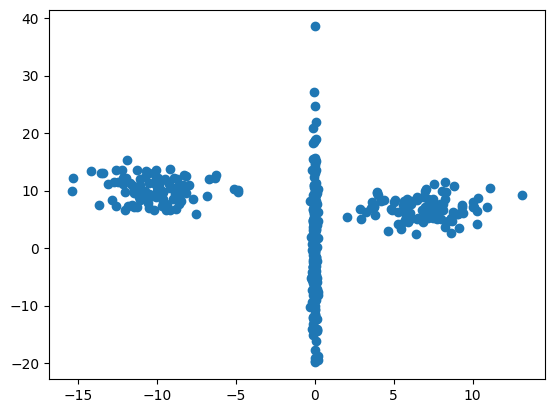

In [106]:
df = np.vstack([cluster_a, cluster_b, cluster_c])
plt.scatter(df[:,0], df[:,1])

In [ ]:
################
#CREATE LIST OF MODELS
################

In [117]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.metrics import silhouette_score

model=  [
        KMeans(n_clusters=3),
        DBSCAN(eps=1.5),
        GaussianMixture(n_components=3),
        fcluster(linkage(df, method='single'), 3, criterion='maxclust') #linkage, fc cluster: object name is "ndarray"
        ]

In [119]:
#Preperation for the table (dataframe)
col = []
algorithms = pd.DataFrame(columns = col)
idx = 0

#Definition of array for labels
array_labels = np.zeros(shape=(4, len(df))) #4 columns = shape 4

#Fit and score algorithm
for a in model:
    if a.__class__.__name__=='ndarray':
        labels = a
        Alg="Hierarchical Clustering"
    else:
        labels = a.fit_predict(df) #saves one line in code instead of using: model.fit(df), labels = model.labels_ 

    score=silhouette_score(df, labels, metric='euclidean')
      
    #definding the table (dataframe)
    if a.__class__.__name__!='ndarray':
        Alg = a.__class__.__name__
    algorithms.loc[idx, 'Algorithm'] = Alg
    algorithms.loc[idx, 'Silhuette score'] = round(score, 2)

    #write into array
    array_labels[idx] = labels 
   
    idx+=1
    

In [ ]:
################
#SCORE - TABLE
################

In [120]:
algorithms.sort_values(by='Silhuette score', ascending=False)

,Algorithm,Silhuette score
0,KMeans,0.56
3,Hierarchical Clustering,0.45
2,GaussianMixture,0.42
1,DBSCAN,0.36


In [ ]:
################
#DATA CHARTS
################

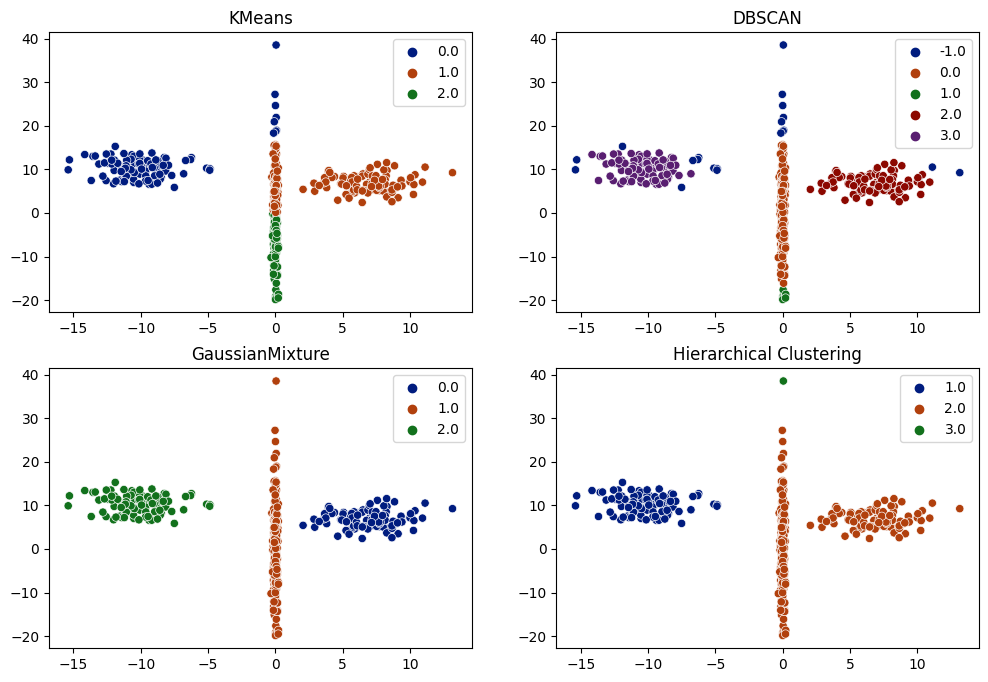

In [116]:
#praparation for charts
fig, axes = plt.subplots(2, 2, figsize=(12,8))

for i in range(4):

    #plot a chart
    if i==0:
        x,y=(0,0)
    elif i==1:
        x,y=(0,1)
    elif i==2:
        x,y=(1,0)
    elif i==3:
        x,y=(1,1)

    chart=sns.scatterplot(data=df, x=df[:,0], y=df[:,1], ax=axes[x][y],
                hue=array_labels[i], palette='dark', legend='full')
    axes[x][y].set(title=algorithms["Algorithm"].iloc[i]) 